# Linear Regression

Linear regression finds the linear relationship between variables. In ML it's between features (an input variable) and a label (an output variable).

The general formula is:

$y' = w_0 + w_1 + x_1 + ... + w_n + x_n$

Where

- $y'$: the output predicted label (what we want to know).
- $w_0/ b$: the bias of the model and is calculated during training.
- $w_i$: the weight of the feature and is calculated during training.
- $x_i$: a feature—the input.

In [1]:
import plotly.express as px
import numpy as np
import pandas as pd

# Create dummy data
x = np.linspace(0, 10, 100)
noise = np.random.normal(loc=0, scale=2, size=x.shape)
y = x + noise

df = pd.DataFrame({'x': x, 'y': y})

# Create a line plot
fig = px.scatter(df, x='x', y='y', title='Noisy Data with x = y linear regression', labels={'x': 'x', 'y': 'y'})

# Add the x = y line
fig.add_scatter(x=df['x'], y=df['x'], mode='lines', name='x = y', line=dict(color='red'))

fig.show()

## Loss

Loss is a measure of how 'wrong' the model is. It's the difference between a model's predictions and the actual readings, and something we aim to minimise.

The most common ways to measure loss are:

| Loss type                  | Definition                                                                      | Equation                                                    |
|----------------------------|---------------------------------------------------------------------------------|------------------------------------------------------------|
| $L_1$ loss                    | The sum of the absolute values of the difference between the predicted values and the actual values. | $L_{\text{1}} = \sum_{i=1}^{N} \left\| y_i - \hat{y}_i \right\|$ |
| Mean absolute error (MAE)  | The average of L1 losses across a set of $N$ examples.                           | $\text{MAE} = \frac{1}{N} \sum_{i=1}^{N} \left\| y_i - \hat{y}_i \right\|$ |
| $L_2$ loss                    | The sum of the squared difference between the predicted values and the actual values. | $L_{\text{2}} = \sum_{i=1}^{N} \left( y_i - \hat{y}_i \right)^2$ |
| Mean squared error (MSE)   | The average of L2 losses across a set of $N$ examples.                           | $\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} \left( y_i - \hat{y}_i \right)^2$ |

To choose between these loss functions we need to consider how we want to approach outliers. The squaring methods will be more severely effected.


# Gradient Descent

Gradient descent is a mathematical technique that iteratively finds the weights and bias that produce the model with the lowest loss.

The model begins training with randomized weights and biases near zero, and then repeats the following steps:

- Calculate the loss with the current weight and bias.
- Determine the direction to move the weights and bias that reduce loss.
- Move the weight and bias values a small amount in the direction that reduces loss.
- Return to step one and repeat the process until the model can't reduce the loss any further.

In a concrete example

- Set the bias and weight to 0.
- Calculate MSE loss with these values.
- Calculate slope of the tangent to the loss function at each weight and the bias. The reason we calculate the slope is to tell us which _direction_ our loss function is going, and _how far_ in respect to our bias and weight variables.
  - A positive slope means the loss increases if you increase the parameter.
  - A negative slope means the loss decreases if you increase the parameter.
- Move a small amount in the direction of the negative slope to get the next weight and bias. This amount is proportional to the size of the slope multiplied by a 'learning weight' which stops us moving too fast in any direction (e.g. 0.1).

## Loss Curve

As we carry out gradient descent we will monitor the loss curve and wait for it to converge. The loss functions for linear models always produce a convex surface. As a result of this property, when a linear regression model converges, we know the model has found the weights and bias that produce the lowest loss.

We may never find the _true_ optimal values of the bias and weights, but we will get very close.

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.optimize import minimize

# Create dummy data
x = np.linspace(0, 10, 100)
noise = np.random.normal(loc=0, scale=2, size=x.shape)
y = x + noise

df = pd.DataFrame({'x': x, 'y': y})

# Define the loss function (mean squared error)
def mse(params, x, y):
    m, b = params
    y_pred = m * x + b
    return np.mean((y - y_pred) ** 2)

# Initial guess for m and b
initial_params = [0, 0]

# To store parameter history
param_history = []

def callback(params):
    param_history.append(params.copy())

# Minimize the loss function
result = minimize(mse, initial_params, args=(x, y), callback=callback)
m_opt, b_opt = result.x

print(f"Scipy Minimize Result: y = {m_opt:.2f}x + {b_opt:.2f}")

# Create regression line
y_reg = m_opt * x + b_opt

# Calculate MSE for each iteration
mse_history = [mse(params, x, y) for params in param_history]

# Plot with Plotly
fig = px.scatter(df, x='x', y='y', title='Noisy Data with x = y and Regression Line', labels={'x': 'x', 'y': 'y'})
fig.add_scatter(x=x, y=x, mode='lines', name='x = y', line=dict(color='red'))
fig.add_scatter(x=x, y=y_reg, mode='lines', name='Regression', line=dict(color='green'))
fig.show()

fig = px.line(
    x=np.arange(1, len(mse_history) + 1),
    y=mse_history,
    labels={'x': 'Iteration', 'y': 'MSE'},
    title='Convergence of MSE during Optimization'
)
fig.update_traces(mode='lines+markers')
fig.show()

Scipy Minimize Result: y = 0.84x + 0.67


# Hyperparameters

Hyperparameters control aspects of the training (e.g. learning rate). Parameters are part of the model itself (e.g. weights and bias).

## Learning Rate

Learning rate is a floating point number you set that influences how quickly the model converges. If the learning rate is too low, the model can take a long time to converge. However, if the learning rate is too high, the model never converges, but instead bounces around the weights and bias that minimize the loss. 

## Batch Size

Batch size is a hyperparameter that refers to the number of examples the model processes before updating its weights and bias. You might think that the model should calculate the loss for every example in the dataset before updating the weights and bias. However, when a dataset contains hundreds of thousands or even millions of examples, using the full batch isn't practical.

- **Stochastic gradient descent (SGD):** Stochastic gradient descent uses only a single example (a batch size of one) per iteration. Given enough iterations, SGD works but is very noisy. "Noise" refers to variations during training that cause the loss to increase rather than decrease during an iteration. 
- **Mini-batch stochastic gradient descent (mini-batch SGD):** Mini-batch stochastic gradient descent is a compromise between full-batch and SGD. For 
 number of data points, the batch size can be any number greater than 1 and less than N. The model chooses the examples included in each batch at random, averages their gradients, and then updates the weights and bias once per iteration.
- **Full batch gradient descent:** Uses the entire batch for training.

## Epochs

During training, an epoch means that the model has processed every example in the training set once. For example, given a training set with 1,000 examples and a mini-batch size of 100 examples, it will take the model 10 iterations to complete one epoch.

For example:

- **Stochastic gradient descent (SGD):** If a dataset contains 1,000 examples and trains for 20 epochs, the model updates the weights and bias 20,000 times.
- **Mini-batch stochastic gradient descent (mini-batch SGD):** If a dataset contains 1,000 examples, and the batch size is 100, and the model trains for 20 epochs, the model updates the weights and bias 200 times.
- **Full batch gradient descent:** After the model looks at all the examples in the dataset. For instance, if a dataset contains 1,000 examples and the model trains for 20 epochs, the model updates the weights and bias 20 times, once per epoch.

# Exercise

Read dataset completed successfully.
Total number of rows: 31694


Maximum fare: 159.25
Mean distance (TRIP_MILES): 8.289462674323214
Number of cab companies: 31
Most frequent payment type: Credit Card
Number of rows with missing data:
0
SUCCESS: defining linear regression functions complete.
Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 248.0905 - rmse: 15.7232
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 82.4713 - rmse: 9.0467
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.9424 - rmse: 4.7808
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.5321 - rmse: 4.1810
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.2753 - rmse: 4.4726
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.6777 - rmse: 3.8263
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.4050 - rmse: 3.6501
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.0958 - rmse: 3.6144
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1449.4120 - rmse: 37.9657
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 246.2620 - rmse: 15.4804
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.5109 - rmse: 3.8053
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.3228 - rmse: 3.7796
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.6914 - rmse: 3.7958
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12.4776 - rmse: 3.5265
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.0368 - rmse: 3.4672
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.0874 - rmse: 3.3215
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.0482 - rmse: 3.3197
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.1082 - rmse: 3.4741
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.6210 - rmse: 3.2330
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.3903 - rmse: 3.3

--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_FARE OBSERVED_FARE L1_LOSS  TRIP_MILES TRIP_MINUTES
0          $42.70        $43.00   $0.30       17.51        22.85
1           $6.19         $5.75   $0.44        0.80         5.00
2           $7.32         $7.00   $0.32        1.17         7.60
3           $9.22         $9.50   $0.28        1.80        11.80
4           $5.64         $5.00   $0.64        0.60         4.00
5          $34.42        $34.75   $0.33       13.80        17.72
6          $16.60        $14.93   $1.67        4.02        31.43
7          $45.53        $45.25   $0.28       18.20        32.62
8          $34.10        $33.50   $0.60       13.28        22.68
9          $45.17        $43.50   $1.67       17.10        45.38
10          $6.60         $5.75   $0.85   

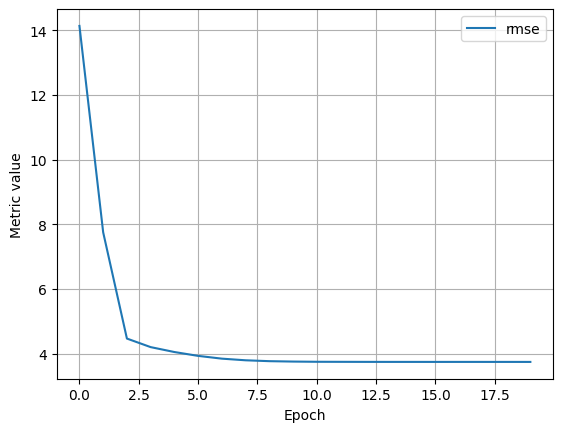

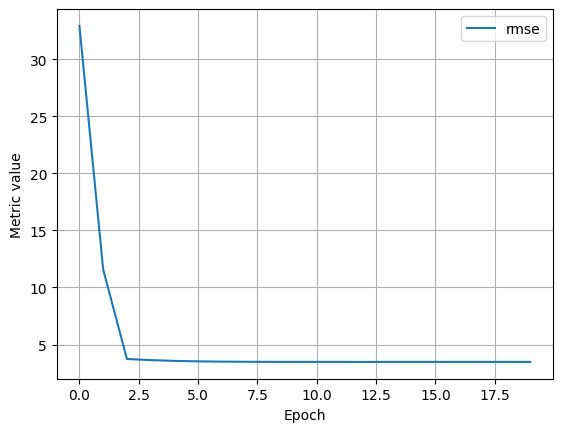

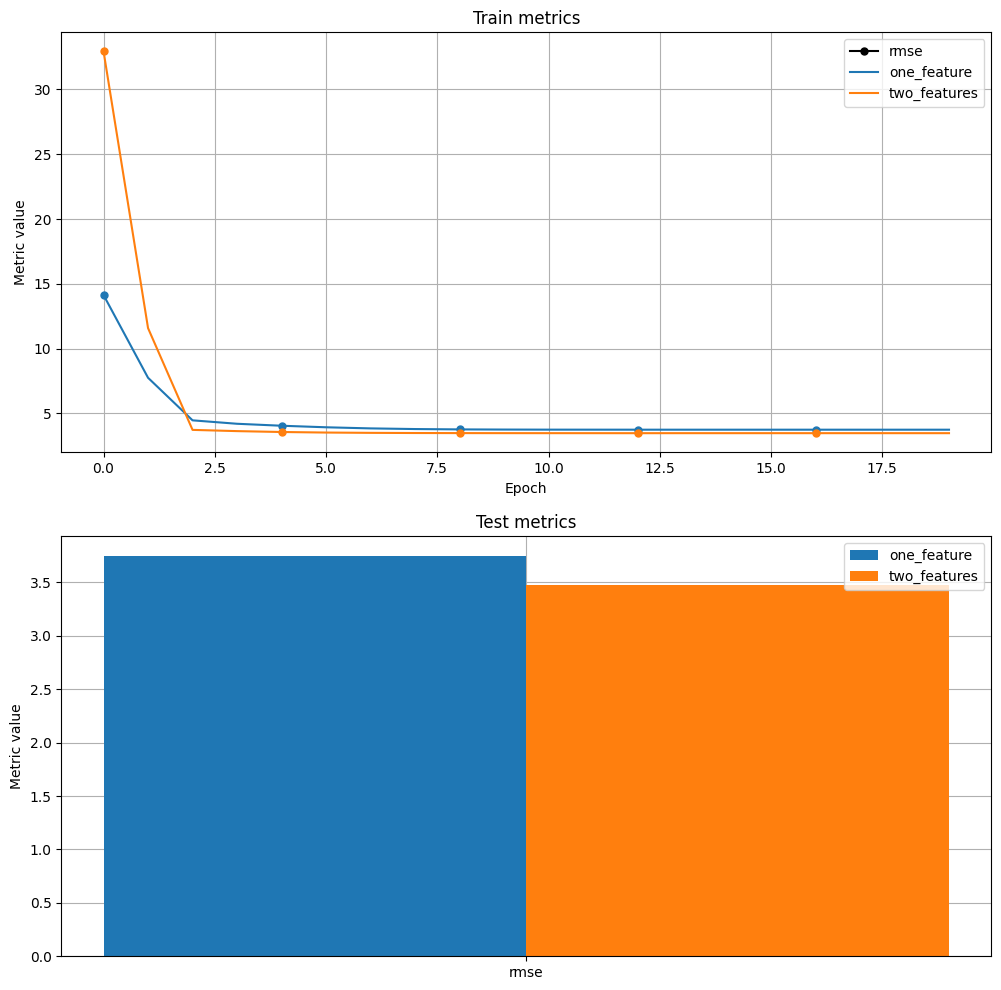

In [ ]:
# data
import numpy as np
import pandas as pd

# machine learning
import keras
import ml_edu.experiment
import ml_edu.results

# data visualization
import plotly.express as px

chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

training_df = chicago_taxi_dataset.loc[:, ('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE')]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(20)

# What is the maximum fare?
max_fare = training_df['FARE'].max()
print(f"Maximum fare: {max_fare}")

# What is the mean distance across all trips?
mean_distance = training_df['TRIP_MILES'].mean()
print(f"Mean distance (TRIP_MILES): {mean_distance}")

# How many cab companies are in the dataset?
num_companies = training_df['COMPANY'].nunique()
print(f"Number of cab companies: {num_companies}")

# What is the most frequent payment type?
most_freq_payment = training_df['PAYMENT_TYPE'].mode()[0]
print(f"Most frequent payment type: {most_freq_payment}")

# Are any features missing data?
missing_rows_with_data_missing = training_df.isnull().sum().sum()
print("Number of rows with missing data:")
print(missing_rows_with_data_missing)

# An important part of machine learning is determining which features correlate with the label.
# View correlation metrics
training_df.corr(numeric_only = True)

# Sometimes it is helpful to visualize relationships between features in a dataset; one 
# way to do this is with a pair plot. A pair plot generates a grid of pairwise plots to 
# visualize the relationship of each feature with all other features all in one place.
px.scatter_matrix(training_df, dimensions=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

# Now we need to train our model
def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
  """Create and compile a simple linear regression model."""

  # For each input feature name specified in the experiment settings,
  # create a Keras Input layer. An Input layer is a placeholder for
  # data that will be fed into the model. Here, each input feature is
  # expected to be a single scalar value (shape=(1,)), and is named
  # according to the feature for clarity and traceability.
  inputs = {name: keras.Input(shape=(1,), name=name) for name in settings.input_features}

  # Combine all the individual input layers into a single tensor using
  # the Concatenate layer. This is necessary because the model expects
  # all features to be presented together as a single input vector for
  # each example. Concatenation stacks the feature values side by side.
  concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))

  # Add a Dense layer with a single unit (neuron) and default linear
  # activation. A Dense layer is a fully connected neural network layer,
  # meaning every input is connected to the output. In linear regression,
  # this single neuron computes a weighted sum of the input features plus
  # a bias, which is the essence of a linear model.
  outputs = keras.layers.Dense(units=1)(concatenated_inputs)

  # Create the Keras Model object, specifying the dictionary of input layers
  # and the single output layer. This model can now be trained and used for
  # predictions. The model's structure reflects a classic linear regression.
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model to prepare it for training. The optimizer (RMSprop)
  # determines how the model weights are updated during training. The loss
  # function ("mean_squared_error") measures how well the model's predictions
  # match the true values. The metrics argument allows tracking additional
  # performance measures during training and evaluation.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                loss="mean_squared_error",
                metrics=metrics)

  # Return the fully constructed and compiled Keras model so it can be trained.
  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:
  """Train the model by feeding it data."""

  # Prepare the input features for training by extracting the values for each
  # feature specified in the settings from the dataset. The result is a dictionary
  # mapping feature names to their corresponding numpy arrays. This matches the
  # input structure expected by the model.
  features = {name: dataset[name].values for name in settings.input_features}

  # Extract the label (target) values from the dataset as a numpy array.
  # The label is what the model will learn to predict.
  label = dataset[label_name].values

  # Train the model using the fit method. This method feeds the features and
  # labels into the model in batches, repeatedly for a number of epochs.
  # The batch size and number of epochs are specified in the experiment settings.
  # The fit method returns a History object that contains details about the
  # training process, such as the loss and metrics at each epoch.
  history = model.fit(x=features,
                      y=label,
                      batch_size=settings.batch_size,
                      epochs=settings.number_epochs)

  # Create and return an Experiment object that encapsulates the results of
  # training. This includes the experiment name, settings, the trained model,
  # the list of completed epochs, and a DataFrame containing the recorded
  # metrics and loss values for each epoch.
  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )

print("SUCCESS: defining linear regression functions complete.")

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

# The following variables are the hyperparameters.
settings_3 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES', 'TRIP_MINUTES']
)

training_df['TRIP_MINUTES'] = training_df['TRIP_SECONDS']/60

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_3 = create_model(settings_3, metrics)

experiment_3 = train_model('two_features', model_3, training_df, 'FARE', settings_3)

ml_edu.results.plot_experiment_metrics(experiment_3, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_3, training_df, 'FARE')

ml_edu.results.compare_experiment([experiment_1, experiment_3], ['rmse'], training_df, training_df['FARE'].values)

def format_currency(x):
  return "${:.2f}".format(x)

# The build_batch function randomly samples a batch of rows from the input DataFrame (df) of the specified batch_size.
# It then resets the index of the sampled batch to be a simple range from 0 to batch_size-1, ensuring a clean, consecutive index.
# Resetting the index is helpful because it makes it easier to access rows by position within the batch,
# which is useful for iterating over the batch or matching predictions to their corresponding inputs.
# This function is typically used to prepare mini-batches for model training or prediction.
def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.set_index(np.arange(batch_size), inplace=True)
  return batch

def predict_fare(model, df, features, label, batch_size=50):
  batch = build_batch(df, batch_size)
  # Generate predicted fare values for the current batch by passing the selected feature columns
  # from the batch DataFrame to the model's predict_on_batch method. This returns the model's
  # output (predicted fares) for each example in the batch, using the specified input features.
  predicted_values = model.predict_on_batch(x={name: batch[name].values for name in features})

  data = {"PREDICTED_FARE": [], "OBSERVED_FARE": [], "L1_LOSS": [],
          features[0]: [], features[1]: []}
  for i in range(batch_size):
    predicted = predicted_values[i][0]
    observed = batch.at[i, label]
    data["PREDICTED_FARE"].append(format_currency(predicted))
    data["OBSERVED_FARE"].append(format_currency(observed))
    data["L1_LOSS"].append(format_currency(abs(observed - predicted)))
    data[features[0]].append(batch.at[i, features[0]])
    data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))

  output_df = pd.DataFrame(data)
  return output_df

def show_predictions(output):
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

output = predict_fare(experiment_3.model, training_df, experiment_3.settings.input_features, 'FARE')
show_predictions(output)

# Things to think about

- Multi-dimensional linear regression